In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt400_s1.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,-9.359358e-12,-4.890509e-12,0.109258,0.251740,0.003501,-0.000443,2.798463,-6.484360e-10,-1.303625e-09,...,-2.343769e-08,2.357784e-09,2.038427e-10,6.058392e-09,0.336436,-0.941706,-0.992651,0.121015,-0.441498,0.897262
1,1,7.800975e-04,-3.643475e-04,0.108347,0.242147,-0.019246,0.004719,2.701918,1.147276e-01,-4.884119e-02,...,-1.088018e-01,-1.328012e-01,6.553946e-02,-3.589120e-01,0.425645,-0.904890,-0.992651,0.121015,-0.449602,0.893229
2,2,2.927678e-03,-1.083898e-03,0.107447,0.223012,-0.073121,0.019161,2.478707,2.159533e-01,-5.791207e-02,...,-1.360140e-01,-2.071383e-01,1.313442e-01,-5.441990e-01,0.615394,-0.788220,-0.992651,0.121015,-0.475664,0.879627
3,3,5.813734e-03,-1.662436e-03,0.105027,0.207796,-0.134938,0.038990,2.230624,2.594943e-01,-3.863473e-02,...,-9.838505e-02,-2.165163e-01,1.611836e-01,-5.528593e-01,0.790098,-0.612981,-0.992651,0.121015,-0.510548,0.859849
4,4,9.126616e-03,-1.992251e-03,0.100698,0.200049,-0.198464,0.062364,1.982211,2.897449e-01,-1.733306e-02,...,-5.397706e-02,-2.212832e-01,1.782335e-01,-5.517175e-01,0.916556,-0.399906,-0.992651,0.121015,-0.542311,0.840178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,-1.865373e+00,-6.891711e-01,0.090615,0.891854,0.177543,2.031785,51.196533,1.151809e-02,-5.675709e-02,...,-1.145318e-02,-3.811949e-02,1.067948e-02,-4.212016e-03,0.802248,0.596991,-0.002810,-0.999996,0.926231,-0.376956
3996,3996,-1.864987e+00,-6.898420e-01,0.090492,0.902753,0.182724,2.028669,51.195126,5.062520e-02,-5.481409e-02,...,9.145479e-03,-4.438218e-02,-2.461144e-02,-2.857535e-03,0.801407,0.598120,-0.002810,-0.999996,0.921431,-0.388543
3997,3997,-1.864231e+00,-6.904370e-01,0.090205,0.912961,0.190879,2.021533,51.192654,4.931714e-02,-3.410111e-02,...,2.847744e-02,-3.125473e-02,-2.834867e-02,-1.317049e-02,0.799926,0.600099,-0.002810,-0.999996,0.912858,-0.408276
3998,3998,-1.863863e+00,-6.907002e-01,0.090303,0.917023,0.197165,2.018777,51.187176,1.513533e-02,-1.170936e-02,...,2.620111e-02,-1.437142e-02,-1.102484e-03,-1.135132e-02,0.796626,0.604472,-0.002810,-0.999996,0.906811,-0.421538


(4000, 45)

Text(0.5, 0, 'Time (s)')

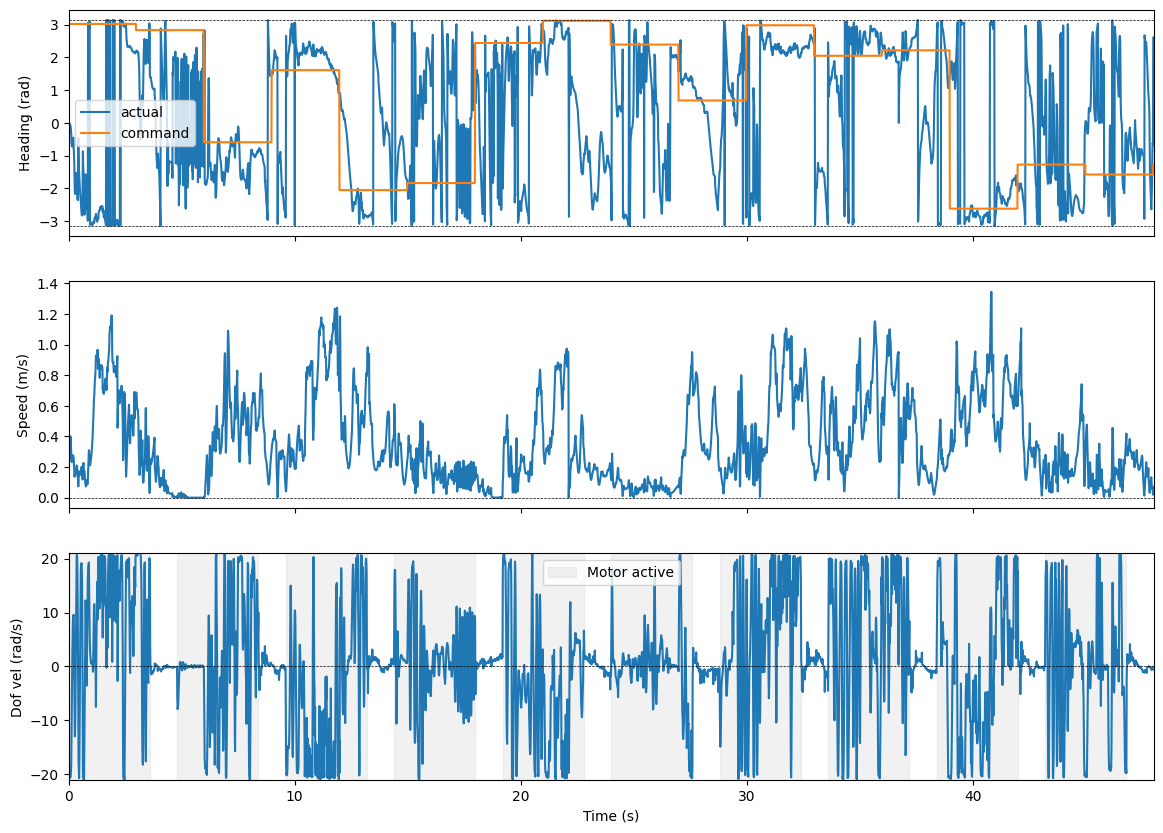

In [7]:
dt = 0.012
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)

des_heading = np.arctan2(df['obs12'], df['obs11']) 

# heading = np.unwrap(heading)
# diff = heading - des_heading
# wrapped_diff = (diff+np.pi)//(2*np.pi)
# # Add the wrapped difference back to angle2
# des_heading = des_heading + wrapped_diff*2*np.pi

fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,10))
axs[0].plot(np.arange(len(df))*dt, heading, label='actual')
axs[0].plot(np.arange(len(df))*dt, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*dt, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*dt, df['obs8']*37.5)
# axs[2].plot(np.arange(len(df))*dt, df['action'])
# axs[2].plot(np.arange(len(df))*dt, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylabel('Dof vel (rad/s)')
axs[2].set_xlim(0,len(df)*dt)

# Create mask for the colored region
episode_length = np.arange(len(df))
mask = ((episode_length % 400) > 0) & ((episode_length % 400) <= 300)

# Plot shaded region
axs[2].fill_between(np.arange(len(df))*dt, -100, 100, 
                    where=mask, 
                    color='lightgray', 
                    alpha=0.3,
                    label='Motor active')
axs[2].set_ylim(-21, 21) # Set reasonable y-limits
axs[2].legend()



axs[-1].set_xlabel('Time (s)')

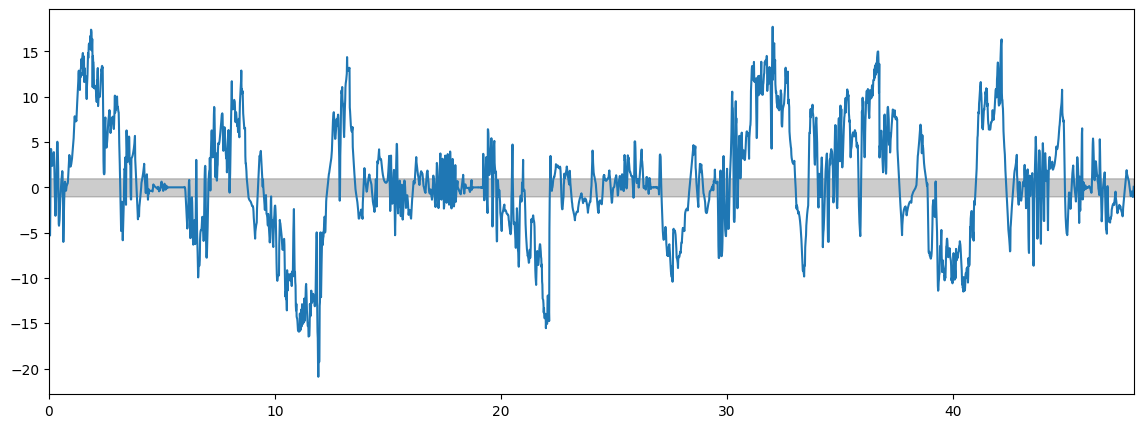

In [8]:
rollangvel = df['obs6']*24
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(df))*dt, rollangvel)
plt.xlim(0, len(df)*dt)


plt.fill_between(np.arange(len(df))*dt, -1, 1, color='k', alpha=0.2)

/tmp/ipykernel_1754246/529650738.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,2000)


(2.7715149851215166, 2000)

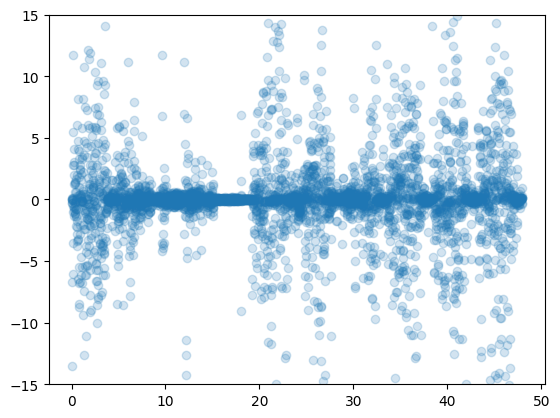

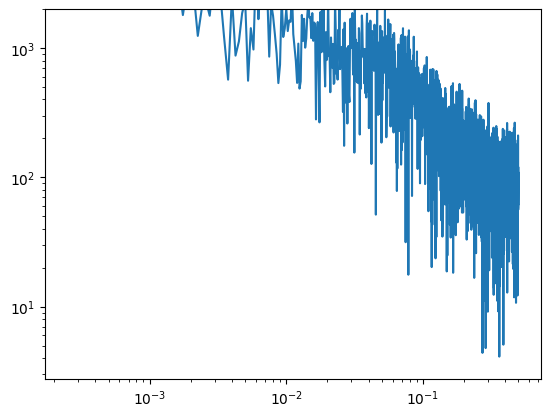

In [7]:
dofvel = df['obs8']*37.5
diffdofvel = np.diff(dofvel,prepend=0)

energy = diffdofvel**2
energy = np.cumsum(energy)

plt.figure()
plt.scatter(np.arange(len(df))*dt, diffdofvel, alpha=0.2)
plt.ylim(-15,15)

#FFT of dofvel
fft = np.fft.fft(dofvel)
frequencies = np.fft.fftfreq(len(dofvel))
plt.figure()
# plt.plot(frequencies, np.abs(fft))
#just the positive frequencies
plt.plot(frequencies[frequencies>0], np.abs(fft[frequencies>0]))
#make loglog
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,2000)

